In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [33]:
# flip a coin five times, observe three heads

n_trials = int(25e3)
noise = stats.norm(0,0.1)
p = np.zeros((n_trials,))
p[0] = 0.5

for i in range(1,n_trials):
    p_old = p[i-1]
    p_new = p_old + noise.rvs()
    p_new = 1 if p_new > 1 else p_new
    p_new = 0 if p_new < 0 else p_new
    
    likelihood_old = 10 * p_old**3 * (1-p_old)**2
    likelihood_new = 10 * p_new**3 * (1-p_new)**2

    if stats.uniform.rvs() < likelihood_new/likelihood_old:
        p[i] = p_new
    else:
        p[i] = p_old


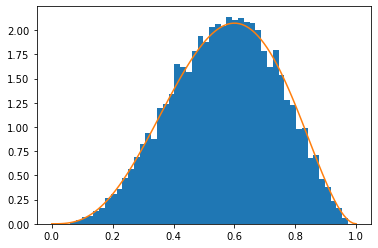

In [34]:
plt.hist(p , density=True , bins = 50)
pp = np.linspace(0,1,num=100)
posterior = 60 * pp**3 * (1-pp)**2
plt.plot(pp,posterior)
plt.show()

In [35]:
# extend the simulation to work with any number of observations
# assume each observation is number of heads out of five flips

observation = np.array([3, 4, 4, 3, 5, 2, 5, 3, 4, 1, 3])

n_trials = int(25e3)
noise = stats.norm(0,0.1)
p = np.zeros((n_trials,))
p[0] = 0.5

for i in range(1,n_trials):
    p_old = p[i-1]
    p_new = p_old + noise.rvs()
    p_new = 1 if p_new > 1 else p_new
    p_new = 0 if p_new < 0 else p_new
    
    likelihood_old = stats.binom(n=5,p=p_old).pmf(observation).prod()
    likelihood_new = stats.binom(n=5,p=p_new).pmf(observation).prod()
    
    if stats.uniform.rvs() < likelihood_new/likelihood_old:
        p[i] = p_new
    else:
        p[i] = p_old


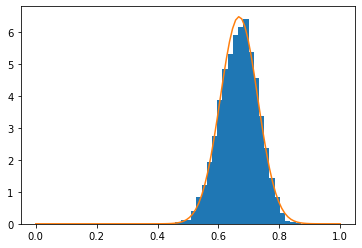

In [36]:
# ditch the first few values
p = p[1000:]

# the possible values of p are normally distributed
# basically, the binomial distribution looks normal
# if you increase the number of trials enough...

plt.hist(p,density=True,bins=25)
mn = p.mean()
sd = p.std()
pp = np.linspace(0,1,num=100)
post = stats.norm(mn,sd).pdf(pp)
plt.plot(pp,post)
plt.show()